<font size = '6' color = 'blue'><b>ch10. Pandas (데이터프레임, 시리즈)</b></font>
- pip install pandas(cmd창에서 실행)

# **1절 Pandas 패키지**
- **데이터 분석**을 위한 반드시 알아야 할 패키지, 넘파이를 기반을 하며, <br>
  다른 라이브러리와 잘 통합되게 설계
- 1차원 구조를 갖는 **시리즈**, 2차원 구조를 갖는 **데이터프레임**을 제공
- 결측치처리, 크기변경(열삭제/추가, 행삭제/추가), 데이터정렬, 데이터분할/병합,<br>
  통계처리, 부분데이터추출, 파일입출력, 레이블링, 시각화용이, ...

In [2]:
import numpy as np
np.pi

3.141592653589793

In [4]:
import pandas as pd
pd.__version__

'2.1.4'

In [6]:
data = pd.read_json('data/ch10_member1.json', encoding='CP949') # 디폴트가 UTF-8
print(type(data))
data

<class 'pandas.core.frame.DataFrame'>


,name,age,email,address
0,홍길동,20,hong@hong.com,서울
1,김김김,25,kim@hong.com,경기
2,박길동,30,park@hong.com,제주


In [11]:
data = pd.read_json('data/ch10_member2.json', encoding='utf-8') # UTF-8로 read
data

,name,age,email,address
0,홍길동,20,hong@hong.com,서울
1,김김김,25,kim@hong.com,경기
2,박길동,30,park@hong.com,제주


In [12]:
member1 = pd.read_csv('data/ch09_member1.csv', header=None,
                      names=['name', 'age', 'email', 'address'],
                      encoding='utf-8') # encoding='utf-8' 기본값이라 생략가능
member1

,name,age,email,address
0,허광한,20,kwang@hong.com,서울시 강동구
1,강동원,33,dong@hong.com,서울시 강서구
2,박원빈,23,park@hong.com,서울시 강남구
3,배수지,20,suzy@hong.com,서울시 강북구
4,박수영,40,imyourjoy@hong.com,서울시 강서구
5,유지민,28,karina@hong.com,서울시 중구


# **2절 데이터프레임 만들기**
# **2.1 딕셔너리 이용해서 데이터프레임 만들기**

In [17]:
d = {'name':['리쯔웨이','왕취안성'], 'age':[20,30]} # 딕셔너리 안에 리스트 들어있는 형태
df = pd.DataFrame(data=d)
df

,name,age
0,리쯔웨이,20
1,왕취안성,30


## **2.2 리스트를 이용하여 데이터프레임 만들기**

In [19]:
d = [{'name':'리쯔웨이', 'age':20}, {'name':'왕취안성', 'age':30}]
df = pd.DataFrame(data=d)
df

,name,age
0,리쯔웨이,20
1,왕취안성,30


## **2.3 read_csv()**

In [21]:
df = pd.read_csv('data/전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv',
                 encoding='cp949')
df.shape # 행,열을 출력

(17, 22)

In [22]:
df.head(2) # 상위 2줄

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581


In [25]:
pd.options.display.max_columns # 최대 데이터프레임의 표현될 수 있는 열 수

22

▲ 데이터는 총 22 columns인데 display되는 최대 columns가 20이라서 20개만 출력

In [24]:
pd.options.display.max_columns = 22
df.sample()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
9,강원,6230,6230,6230,6141,6373,6350,6350,6268,6268,6419,6631,6365,6365,6348,6350,6182,6924,6846,6986,7019,7008


## **2.4 sklearn, statsmodels, searborn 등의 라이브러리에서 데이터프레임 불러오기**

In [28]:
import statsmodels.api as sm
iris = sm.datasets.get_rdataset("iris", package="datasets").data
iris.tail() # 끝에서 부터 5행

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


# **3절 이름(열 index, 행 column) 지정하기**

In [30]:
member_df = pd.read_csv('data/ch09_member1.csv', header=None)
member_df

,0,1,2,3
0,허광한,20,kwang@hong.com,서울시 강동구
1,강동원,33,dong@hong.com,서울시 강서구
2,박원빈,23,park@hong.com,서울시 강남구
3,배수지,20,suzy@hong.com,서울시 강북구
4,박수영,40,imyourjoy@hong.com,서울시 강서구
5,유지민,28,karina@hong.com,서울시 중구


In [33]:
# 열 이름 지정하기
member_df.columns = ['name', 'age', 'email', 'address']
member_df

,name,age,email,address
0,허광한,20,kwang@hong.com,서울시 강동구
1,강동원,33,dong@hong.com,서울시 강서구
2,박원빈,23,park@hong.com,서울시 강남구
3,배수지,20,suzy@hong.com,서울시 강북구
4,박수영,40,imyourjoy@hong.com,서울시 강서구
5,유지민,28,karina@hong.com,서울시 중구


In [34]:
member_df = pd.concat([member_df, member_df])
member_df

,name,age,email,address
0,허광한,20,kwang@hong.com,서울시 강동구
1,강동원,33,dong@hong.com,서울시 강서구
2,박원빈,23,park@hong.com,서울시 강남구
3,배수지,20,suzy@hong.com,서울시 강북구
4,박수영,40,imyourjoy@hong.com,서울시 강서구
5,유지민,28,karina@hong.com,서울시 중구
0,허광한,20,kwang@hong.com,서울시 강동구
1,강동원,33,dong@hong.com,서울시 강서구
2,박원빈,23,park@hong.com,서울시 강남구
3,배수지,20,suzy@hong.com,서울시 강북구


▲ 연속되지 않은 행을 가짐<br>
∴ 해결하기 위한 방법! ▼

In [35]:
member_df.index

Index([0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5], dtype='int64')

In [37]:
member_df.index = ['동', '서', '남', '북']
member_df

ValueError: Length mismatch: Expected axis has 12 elements, new values have 4 elements

In [38]:
member_df.index = range(len(member_df))
member_df

,name,age,email,address
0,허광한,20,kwang@hong.com,서울시 강동구
1,강동원,33,dong@hong.com,서울시 강서구
2,박원빈,23,park@hong.com,서울시 강남구
3,배수지,20,suzy@hong.com,서울시 강북구
4,박수영,40,imyourjoy@hong.com,서울시 강서구
5,유지민,28,karina@hong.com,서울시 중구
6,허광한,20,kwang@hong.com,서울시 강동구
7,강동원,33,dong@hong.com,서울시 강서구
8,박원빈,23,park@hong.com,서울시 강남구
9,배수지,20,suzy@hong.com,서울시 강북구


In [46]:
# name을 행 이름
# memBer_df = member_df.set_index("name") 결과를 변수에 할당, inplace=False 적용된 내용 return
member_df.set_index("name", inplace=True) # inplace=True 데이터프레임에 적용                                
member_df

,index,age,email,address
name,,,,
허광한,0,20,kwang@hong.com,서울시 강동구
강동원,1,33,dong@hong.com,서울시 강서구
박원빈,2,23,park@hong.com,서울시 강남구
배수지,3,20,suzy@hong.com,서울시 강북구
박수영,4,40,imyourjoy@hong.com,서울시 강서구
유지민,5,28,karina@hong.com,서울시 중구
허광한,6,20,kwang@hong.com,서울시 강동구
강동원,7,33,dong@hong.com,서울시 강서구
박원빈,8,23,park@hong.com,서울시 강남구


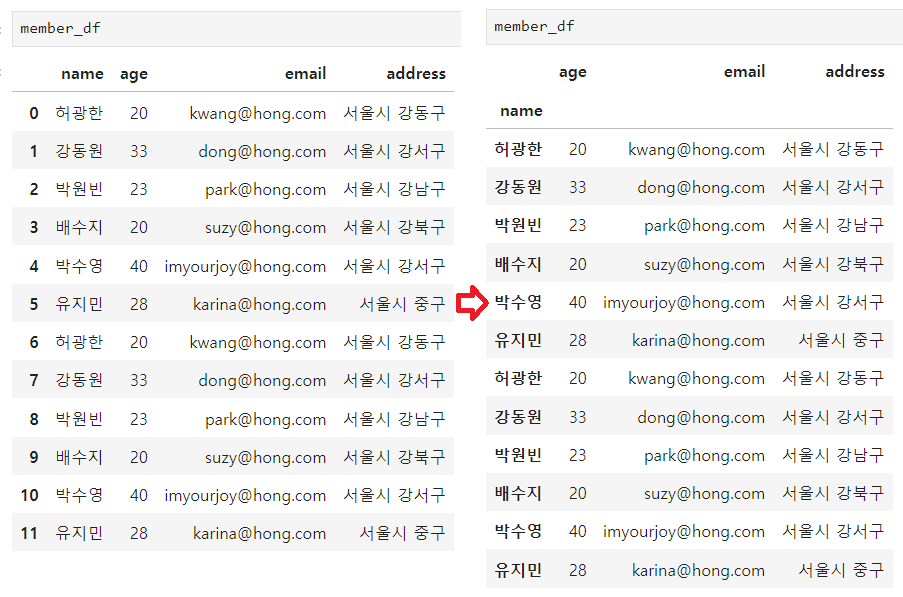

In [50]:
# 행 이름을 컬럼에 편입시키다
# member_df = member_df.reset_index() # reset 적용한 것을 return
member_df.reset_index(inplace=True) # reset을 member_df에 적용
member_df

,level_0,name,index,age,email,address
0,0,허광한,0,20,kwang@hong.com,서울시 강동구
1,1,강동원,1,33,dong@hong.com,서울시 강서구
2,2,박원빈,2,23,park@hong.com,서울시 강남구
3,3,배수지,3,20,suzy@hong.com,서울시 강북구
4,4,박수영,4,40,imyourjoy@hong.com,서울시 강서구
5,5,유지민,5,28,karina@hong.com,서울시 중구
6,6,허광한,6,20,kwang@hong.com,서울시 강동구
7,7,강동원,7,33,dong@hong.com,서울시 강서구
8,8,박원빈,8,23,park@hong.com,서울시 강남구
9,9,배수지,9,20,suzy@hong.com,서울시 강북구


In [61]:
name = member_df['name'] # 시리즈
print(type(name))
name

<class 'pandas.core.series.Series'>


0     허광한
1     강동원
2     박원빈
3     배수지
4     박수영
5     유지민
6     허광한
7     강동원
8     박원빈
9     배수지
10    박수영
11    유지민
Name: name, dtype: object

In [48]:
member_df[0] # 한 행만 가져올 때 대괄호X

KeyError: 0

In [62]:
memeber = member_df.loc[0] # 0번 인덱스 행 => 시리즈
print(type(member))
member

<class 'pandas.core.frame.DataFrame'>


,name,age,email,address
0,허광한,20,kwang@hong.com,서울시 강동구
1,강동원,33,dong@hong.com,부산시 강서구
2,박원빈,23,park@hong.com,서울시 강남구
3,배수지,20,suzy@hong.com,서울시 강북구
4,박수영,40,imyourjoy@hong.com,서울시 강서구
5,유지민,28,karina@hong.com,서울시 중구


In [53]:
member_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   level_0  12 non-null     int64 
 1   name     12 non-null     object
 2   index    12 non-null     int64 
 3   age      12 non-null     int64 
 4   email    12 non-null     object
 5   address  12 non-null     object
dtypes: int64(3), object(3)
memory usage: 708.0+ bytes


In [54]:
member_df['age'] = member_df['age'].astype('float64') # 데이터 프레임의 열의 타입을 변경

In [55]:
member_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   level_0  12 non-null     int64  
 1   name     12 non-null     object 
 2   index    12 non-null     int64  
 3   age      12 non-null     float64
 4   email    12 non-null     object 
 5   address  12 non-null     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 708.0+ bytes


# **4절 부분 데이터 조회**

- 특정 열, 특정 행, 특정 행의 특정 열, 특정 조건의 행, 특정 조건의 행의 특정 열

In [58]:
member = pd.read_csv('data/ch09_member2.csv')
member

,name,age,email,address
0,허광한,20,kwang@hong.com,서울시 강동구
1,강동원,33,dong@hong.com,부산시 강서구
2,박원빈,23,park@hong.com,서울시 강남구
3,배수지,20,suzy@hong.com,서울시 강북구
4,박수영,40,imyourjoy@hong.com,서울시 강서구
5,유지민,28,karina@hong.com,서울시 중구


## **4.1 단일 열 조회**

In [67]:
member['name'] # 시리즈

0    허광한
1    강동원
2    박원빈
3    배수지
4    박수영
5    유지민
Name: name, dtype: object

In [68]:
member['name'].to_frame() # 시리즈를 데이터 프레임으로

,name
0,허광한
1,강동원
2,박원빈
3,배수지
4,박수영
5,유지민


## **4.2 loc[]을 이용한 이름(열, 행)으로 조회**
- 단일행, 여러행, 여러열, 행과 열을 동시에 접근
- member.loc[행, 열] or member.loc[행(행슬라이싱), 열(열슬라이싱)]

In [69]:
member[0]

KeyError: 0

In [71]:
# 단일행
member.loc[0] # 시리즈

name                  허광한
age                    20
email      kwang@hong.com
address           서울시 강동구
Name: 0, dtype: object

In [72]:
# 여러행
member.loc[0:5] # 0행 ~ 5행까지

,name,age,email,address
0,허광한,20,kwang@hong.com,서울시 강동구
1,강동원,33,dong@hong.com,부산시 강서구
2,박원빈,23,park@hong.com,서울시 강남구
3,배수지,20,suzy@hong.com,서울시 강북구
4,박수영,40,imyourjoy@hong.com,서울시 강서구
5,유지민,28,karina@hong.com,서울시 중구


In [76]:
# 여러 열
member.loc['name'] # 이렇게는 불가

KeyError: 'name'

In [87]:
# 여러 열 (name열 부터 email열 까지 == age열 포함)
member.loc[:, 'name':'email'] # from:to:step ⇒ 슬라이싱 아님

,name,age,email
0,허광한,20,kwang@hong.com
1,강동원,33,dong@hong.com
2,박원빈,23,park@hong.com
3,배수지,20,suzy@hong.com
4,박수영,40,imyourjoy@hong.com
5,유지민,28,karina@hong.com


In [78]:
# 여러 열(name 열과 email열)
member.loc[:, ['name','email']]

,name,email
0,허광한,kwang@hong.com
1,강동원,dong@hong.com
2,박원빈,park@hong.com
3,배수지,suzy@hong.com
4,박수영,imyourjoy@hong.com
5,유지민,karina@hong.com


In [79]:
# 1행부터 4행까지 name과 email 출력
member.loc[1:4, ['name', 'email']]

,name,email
1,강동원,dong@hong.com
2,박원빈,park@hong.com
3,배수지,suzy@hong.com
4,박수영,imyourjoy@hong.com


In [81]:
# 1행과 4행, name, email, address 열 출력
member.loc[[1,4], ['name','email', 'address']]

,name,email,address
1,강동원,dong@hong.com,부산시 강서구
4,박수영,imyourjoy@hong.com,서울시 강서구


In [85]:
# 1행~4행, name열~email열 출력
#member.loc[1:4, 0:3] # 불가. 에러남

# loc 사용 시 index 이름과 column 이름을 사용
member.loc[1:4, 'name':'email']

,name,age,email
1,강동원,33,dong@hong.com
2,박원빈,23,park@hong.com
3,배수지,20,suzy@hong.com
4,박수영,40,imyourjoy@hong.com


## **4.3 iloc[]을 이용한 숫자(인덱스)로 조회**
- 몇 번째 행부터 몇 번째 행 앞까지, 몇 번째 열부터 몇 번째 열 앞까지, 음수가능

In [88]:
member.iloc[0:4] # 슬라이싱 from:to:step ;from부터 to앞까지 step씩

,name,age,email,address
0,허광한,20,kwang@hong.com,서울시 강동구
1,강동원,33,dong@hong.com,부산시 강서구
2,박원빈,23,park@hong.com,서울시 강남구
3,배수지,20,suzy@hong.com,서울시 강북구


In [90]:
member.iloc[0, 0:3] # 0열부터 3열 앞까지

name                허광한
age                  20
email    kwang@hong.com
Name: 0, dtype: object

In [94]:
# 맨 오른쪽 열을 제외하고 출력
#member.iloc[:,  :3]
member.iloc[:,  :-1]

,name,age,email
0,허광한,20,kwang@hong.com
1,강동원,33,dong@hong.com
2,박원빈,23,park@hong.com
3,배수지,20,suzy@hong.com
4,박수영,40,imyourjoy@hong.com
5,유지민,28,karina@hong.com


In [97]:
# 0,2,4,6,... 짝수번째 행의 모든 열 출력
member.iloc[::2] # 열 지정 가능; member.iloc[::2, 0:2]

,name,age,email,address
0,허광한,20,kwang@hong.com,서울시 강동구
2,박원빈,23,park@hong.com,서울시 강남구
4,박수영,40,imyourjoy@hong.com,서울시 강서구


In [98]:
# member의 행 순서를 역순 출력 (맨 마지막 열을 제외하고)
member.iloc[::-1, :-1]

,name,age,email
5,유지민,28,karina@hong.com
4,박수영,40,imyourjoy@hong.com
3,배수지,20,suzy@hong.com
2,박원빈,23,park@hong.com
1,강동원,33,dong@hong.com
0,허광한,20,kwang@hong.com


## **4.4 조건으로 조회하기**

In [101]:
# 30살 이상의 데이터 이상
member.loc[member['age'] > 30] # 인덱스 대신 조건

,name,age,email,address
1,강동원,33,dong@hong.com,부산시 강서구
4,박수영,40,imyourjoy@hong.com,서울시 강서구


In [108]:
address = "서울시 강동구"
address.find("강동구")

4

In [109]:
member['address'].find('강서구')

AttributeError: 'Series' object has no attribute 'find'

▲ member['address'].find('강서구') 를 쓸 수 없음!<br>
∴ 시리즈에 문자 함수를 사용하는 방법<br>
https://pandas.pydata.org/pandas-docs/stable/reference/series.html#string-handling

In [110]:
member['address'].str.find('강서구')==-1

0     True
1    False
2     True
3     True
4    False
5     True
Name: address, dtype: bool

In [111]:
# address가 '강서구'인 데이터의 name, age, address를 출력하시오
member.loc[member['address'].str.find('강서구') != -1, ['name', 'age', 'address']]

,name,age,address
1,강동원,33,부산시 강서구
4,박수영,40,서울시 강서구


In [112]:
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     6 non-null      object
 1   age      6 non-null      int64 
 2   email    6 non-null      object
 3   address  6 non-null      object
dtypes: int64(1), object(3)
memory usage: 324.0+ bytes


In [113]:
member.isna() # 결측치

,name,age,email,address
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False


▲ 모든 열과 행과 결측치이면 True, 아니면 False

In [115]:
# 하나하나 True, False 확인하기 어려우니
member.isna().sum() # 결측치 확인

name       0
age        0
email      0
address    0
dtype: int64

결국 0이 나왔다는 건 결측치는 없다는 것.

**▼ iris 데이터 활용**

In [136]:
# iris
import seaborn as sns
iris_df = sns.load_dataset('iris')
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [131]:
# 0~49 setosa/ 50~99 versicolor/ 100~149 virginica
iris_df.loc[100:149].head()

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica


In [132]:
# species가 versicolor인 데이터의 상위 5개의 모든 열
iris_df[iris_df['species']=='versicolor'].head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [133]:
# species가 versicolor인 데이터의 맨 마지막 열을 제외한 데이터
iris_df.loc[iris_df['species']=='versicolor', 'sepal_length':'petal_width'].head(3)

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5


▼ 아래 코드 결과 이상함 다시 확인

In [137]:
# species가 versicolor인 데이터의 맨 마지막 열을 제외한 데이터
iris_df.iloc[:, :-1][iris_df['species']=='veriscolor']

,sepal_length,sepal_width,petal_length,petal_width


In [142]:
# sepal.Length가 6.2보다 크고, species가 versicolor인 데이터를 출력
# 참고 iris_df['species'] == iris_df.species
iris_df[(iris_df.species == 'versicolor') & (iris_df.sepal_length > 6.2)]

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
54,6.5,2.8,4.6,1.5,versicolor
56,6.3,3.3,4.7,1.6,versicolor
58,6.6,2.9,4.6,1.3,versicolor
65,6.7,3.1,4.4,1.4,versicolor
72,6.3,2.5,4.9,1.5,versicolor
74,6.4,2.9,4.3,1.3,versicolor
75,6.6,3.0,4.4,1.4,versicolor


In [144]:
# sepal.Length가 6.2보다 크고, species가 versicolor인 데이터의 sepal_length와 species, sepal_width를 출력
iris_df.loc[(iris_df.species == 'versicolor') & (iris_df.sepal_length > 6.2), 
            ['sepal_length','sepal_width', 'species']]

,sepal_length,sepal_width,species
50,7.0,3.2,versicolor
51,6.4,3.2,versicolor
52,6.9,3.1,versicolor
54,6.5,2.8,versicolor
56,6.3,3.3,versicolor
58,6.6,2.9,versicolor
65,6.7,3.1,versicolor
72,6.3,2.5,versicolor
74,6.4,2.9,versicolor
75,6.6,3.0,versicolor


# **5절 데이터 추가 및 삭제**

In [146]:
member

,name,age,email,address
0,허광한,20,kwang@hong.com,서울시 강동구
1,강동원,33,dong@hong.com,부산시 강서구
2,박원빈,23,park@hong.com,서울시 강남구
3,배수지,20,suzy@hong.com,서울시 강북구
4,박수영,40,imyourjoy@hong.com,서울시 강서구
5,유지민,28,karina@hong.com,서울시 중구


In [152]:
import numpy as np
member['major'] = ['컴공', '전기', '전자', '기계', 'AI', np.nan] # 결측치 np.nan
member

,name,age,email,address,major
0,허광한,20,kwang@hong.com,서울시 강동구,컴공
1,강동원,33,dong@hong.com,부산시 강서구,전기
2,박원빈,23,park@hong.com,서울시 강남구,전자
3,배수지,20,suzy@hong.com,서울시 강북구,기계
4,박수영,40,imyourjoy@hong.com,서울시 강서구,AI
5,유지민,28,karina@hong.com,서울시 중구,NaN


In [155]:
hobby = pd.DataFrame({'hobby' : ['놀기', '자기', '읽기', '먹기', '공부', '명상']})
hobby

,hobby
0,놀기
1,자기
2,읽기
3,먹기
4,공부
5,명상


In [157]:
pd.concat([member, hobby], axis=1)

,name,age,email,address,major,hobby
0,허광한,20,kwang@hong.com,서울시 강동구,컴공,놀기
1,강동원,33,dong@hong.com,부산시 강서구,전기,자기
2,박원빈,23,park@hong.com,서울시 강남구,전자,읽기
3,배수지,20,suzy@hong.com,서울시 강북구,기계,먹기
4,박수영,40,imyourjoy@hong.com,서울시 강서구,AI,공부
5,유지민,28,karina@hong.com,서울시 중구,NaN,명상


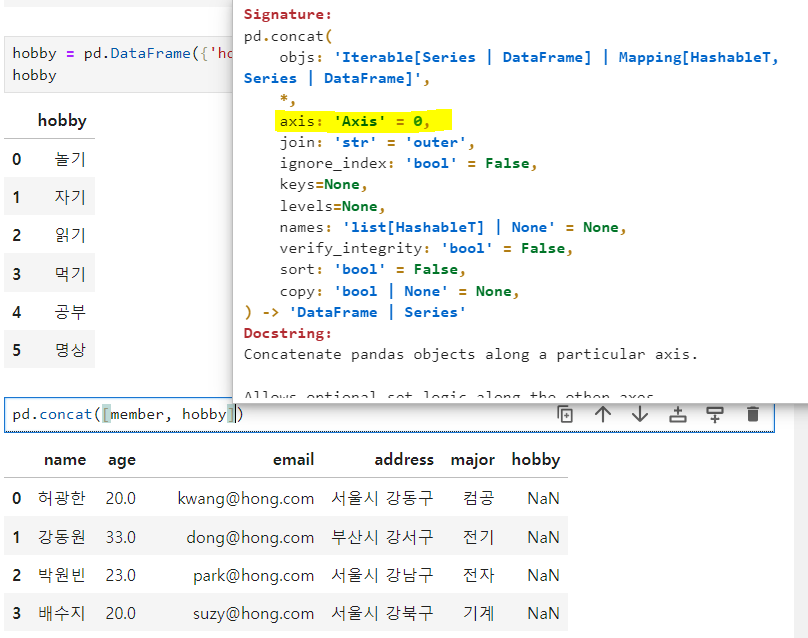

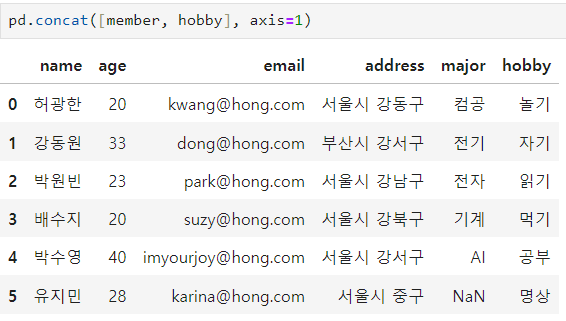

In [164]:
member = pd.concat([memeber, hobby], axis=1)
member

,0,hobby
level_0,0,NaN
name,허광한,NaN
index,0,NaN
age,20.0,NaN
email,kwang@hong.com,NaN
address,서울시 강동구,NaN
0,NaN,놀기
1,NaN,자기
2,NaN,읽기
3,NaN,먹기


In [159]:
member.drop('hobby')
# 삭제할 열이 많으면 리스트로 만들면 됨
# member.drop(['hobby', 'major'], axis=1, inplace=True)

KeyError: "['hobby'] not found in axis"

이쯤 부분 약간 놓침

In [ ]:
# 행 삭제
member.drop(4, inplace=True) #inplace=True까지해야 member 삭제됨

In [ ]:
member

# **6절 정렬**

In [169]:
member = member.sort_index(ascending=False) # 인덱스로 정렬
member

,0,hobby
11,NaN,명상
10,NaN,공부
9,NaN,먹기
8,NaN,읽기
7,NaN,자기
6,NaN,놀기
5,서울시 강동구,NaN
4,kwang@hong.com,NaN
3,20.0,NaN
2,0,NaN


In [ ]:
# 특정 열의 값 기준 정렬
member.sort_values(by=['name', 'age'], ascending=False, inplce=True) #ascending=False ㅎ~ㄱ
member

# **7장 기초통계 분석**
- count : NA(결측치)를 제외한 개수
- min
- max
- sum
- mean
- std : 표준편차
- var : 분산
- quantile 분위수(1사분위수, 2사분위수, 3사분위수)
- median 중간값
- corr : 상관관계<br>
※ NA(결측치) ≠ 빈 string, space

In [175]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [180]:
iris_df.min() # 모든 행의 열의 최소값..?무ㅜㅏ???
#iris_df.min(axis=0)

sepal_length       4.3
sepal_width        2.0
petal_length       1.0
petal_width        0.1
species         setosa
dtype: object

In [181]:
iris_df.iloc[:,:-1].min(axis=1) # 행마다 모든 열의 최소값

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Length: 150, dtype: float64

In [182]:
iris_df.max()

sepal_length          7.9
sepal_width           4.4
petal_length          6.9
petal_width           2.5
species         virginica
dtype: object

In [183]:
iris_df.iloc[:,:-1].mean()

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [185]:
# mean만 보면 서장훈 iris가 있으면 정확도 떨어짐. 따라서 표준편차도 확인
iris_df.iloc[:,:-1].std()

sepal_length    0.828066
sepal_width     0.435866
petal_length    1.765298
petal_width     0.762238
dtype: float64

In [187]:
iris_df.describe() # 수치형 데이터의 개수, 평균, 표준편차, 최소 최대, 사분위

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [189]:
iris_df['species'].describe() # 범주형 데이터 : 전체 데이터 개수

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

In [192]:
iris_df.describe(include='all') # 수치형과 범주형 데이터 모두 describe

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


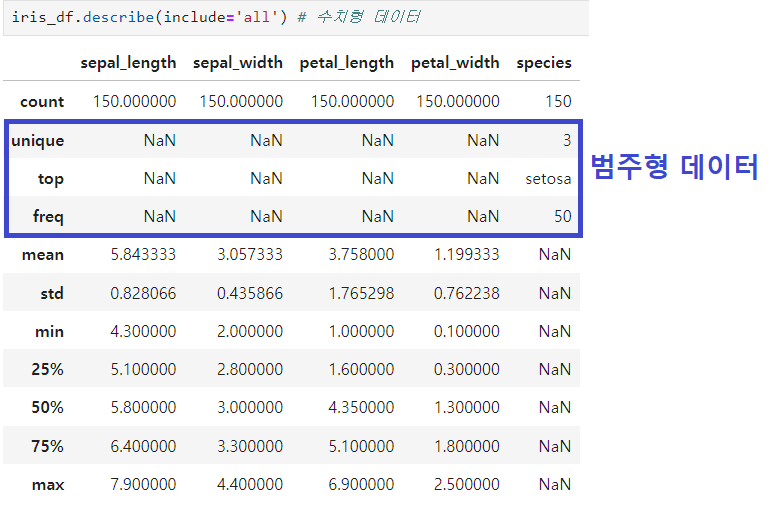

In [194]:
iris_df[iris_df['species'].isna()] # species가 결측치인 행을 출력 ⇒ 하나도 없어서 안나옴

,sepal_length,sepal_width,petal_length,petal_width,species


# **8절 그룹화**

In [199]:
iris_df.groupby(['species']).mean()
# 그룹화 할 열이 1개일땐, iris_df.groupby('species').mean() 도 가능

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [200]:
iris_group = iris_df.groupby(['species'])
iris_group.mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


# **연습문제**

In [6]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris.sample(1)

,sepal_length,sepal_width,petal_length,petal_width,species
114,5.8,2.8,5.1,2.4,virginica


In [209]:
# 1. iris 데이터에서 처음 다섯 개 행만 출력하세요
iris_test.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [230]:
# iris 데이터를 데이터프레임 변수인 독립변수 X와 종속변수 y로 나누세요. (종속변수는 Species 열)
# hint: y=iris.loc[:,'species'].to_Frame()
#y=iris.loc[:,'species'].to_Frame()
X = iris_test.iloc[:, :-1]
y = iris_test.iloc[:, 4:5]

In [213]:
# 3. iris 데이터에서 처음 50개행을 빼내서 temp변수에 저장하세요
temp = iris.head(50)

In [215]:
# 4. 3번에서 선택한 데이터프레임의 요약정보를 출력하세요. 모든 열에 대해 요약정보가 출력되어야 합니다.


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa


In [231]:
# 5. versicolor 종의 데이터만 iris_versicolor 변수에 저장하세요.
iris_versicolor = iris_test.iloc[:, :-1][iris_test['species']=='versicolor']

In [233]:
iris_versicolor

,sepal_length,sepal_width,petal_length,petal_width


In [234]:
# 6. 2번의 X와 y변수를 합해서 iris_df데이터 프레임으로 만드세요
# hint: X와 y합하기 : pd.concat([X, y], axis=1)
iris_test = pd.concat([X, y], axis=1)
iris_test

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [214]:
# 7. iris 데이터의 각 열 평균값을 출력하세요.
iris_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# 8. iris 데이터의 각 열들 사이의 상관계수를 출력하세요
r = iris.iloc[:,:-1].corr()
r

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [ ]:
# 9. iris 데이터의 종별 평균을 출력하세요
iris

**▼ 8번 문제의 r을 시각화(그래프)**

<Axes: >

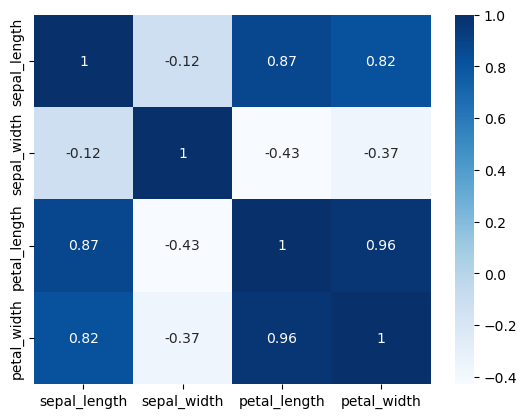

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(r, annot=True, cmap='Blues')
# seaborn 라이브러리 업그레이드 : 아나콘다 프롬프트 > pip install seaborn --upgrade
# seaborn 라이브러리 업그레이드 확인: pip show seaborn

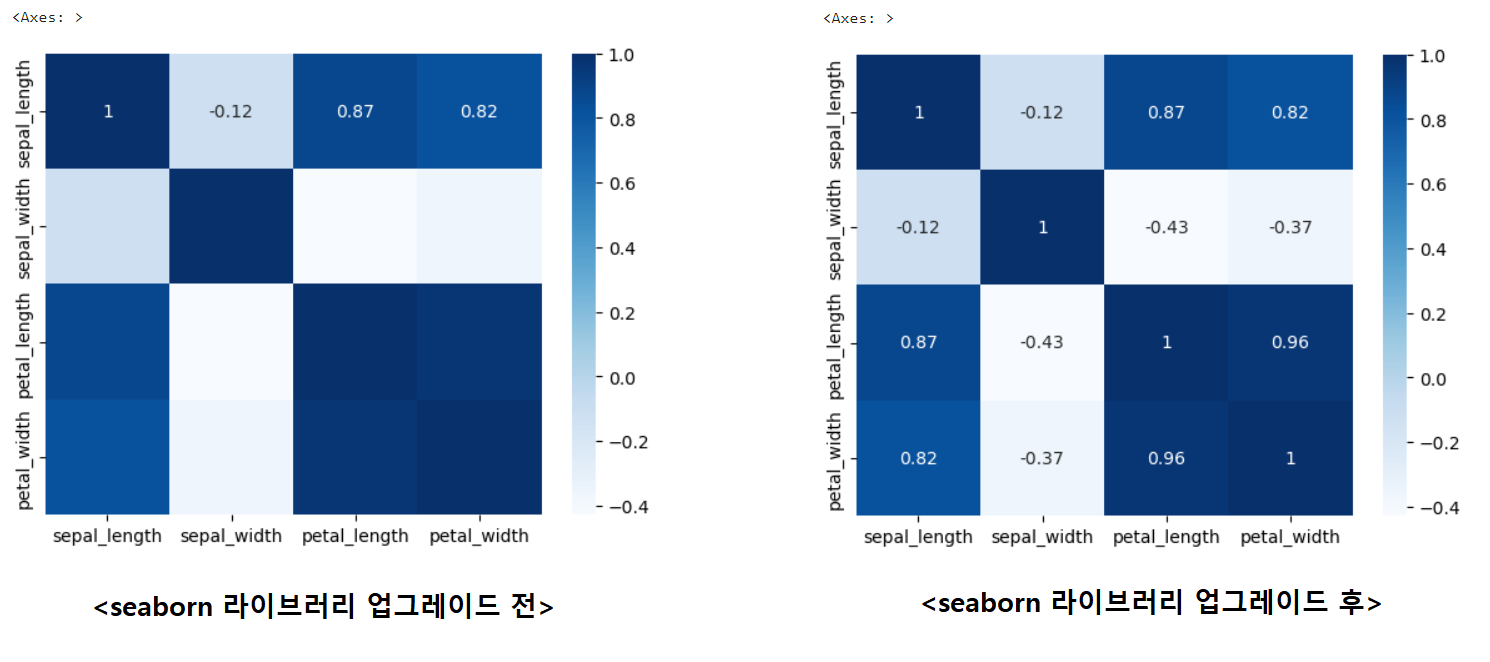